In [1]:
from tensorflow.python.client import device_lib

W0616 11:12:04.788862 140263442528064 deprecation_wrapper.py:118] From /home/zander/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py:97: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W0616 11:12:04.789933 140263442528064 deprecation_wrapper.py:118] From /home/zander/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py:97: The name tf.AttrValue is deprecated. Please use tf.compat.v1.AttrValue instead.

W0616 11:12:04.790390 140263442528064 deprecation_wrapper.py:118] From /home/zander/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py:97: The name tf.COMPILER_VERSION is deprecated. Please use tf.version.COMPILER_VERSION instead.

W0616 11:12:04.790832 140263442528064 deprecation_wrapper.py:118] From /home/zander/anaconda3/lib/python3.7/site-packages/tensorflow/__init__.py:97: The name tf.CXX11_ABI_FLAG is deprecated. Please use tf.sysconfig.CXX11_ABI_FLAG instead.

W0616 11:12:04.791207 140263442528064 deprecation_wrappe

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8291642732643943773, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15889074885056775407
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12209026404835482182
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7848083456
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4245977319716350914
 physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"]

In [3]:
# imports for array-handling and plotting
import numpy as np
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

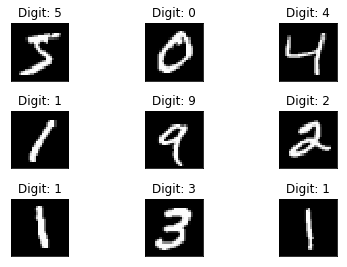

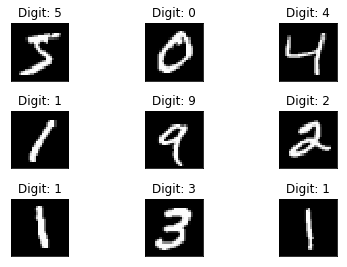

In [6]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

In [7]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [8]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [9]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

W0616 11:12:13.758695 140263442528064 deprecation.py:506] From /home/zander/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

W0616 11:12:14.418189 140263442528064 deprecation_wrapper.py:118] From /home/zander/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

W0616 11:12:15.107646 140263442528064 deprecation.py:323] From /home/zander/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/ops/math_grad.py:1251: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.2510 - acc: 0.9246 - val_loss: 0.1151 - val_acc: 0.9652
Epoch 2/20
 - 1s - loss: 0.1019 - acc: 0.9682 - val_loss: 0.0825 - val_acc: 0.9737
Epoch 3/20
 - 1s - loss: 0.0697 - acc: 0.9777 - val_loss: 0.0765 - val_acc: 0.9746
Epoch 4/20
 - 1s - loss: 0.0558 - acc: 0.9818 - val_loss: 0.0748 - val_acc: 0.9773
Epoch 5/20
 - 1s - loss: 0.0466 - acc: 0.9851 - val_loss: 0.0612 - val_acc: 0.9820
Epoch 6/20
 - 1s - loss: 0.0398 - acc: 0.9869 - val_loss: 0.0589 - val_acc: 0.9833
Epoch 7/20
 - 1s - loss: 0.0343 - acc: 0.9887 - val_loss: 0.0695 - val_acc: 0.9809
Epoch 8/20
 - 1s - loss: 0.0315 - acc: 0.9897 - val_loss: 0.0777 - val_acc: 0.9787
Epoch 9/20
 - 1s - loss: 0.0279 - acc: 0.9910 - val_loss: 0.0652 - val_acc: 0.9828
Epoch 10/20
 - 1s - loss: 0.0258 - acc: 0.9918 - val_loss: 0.0640 - val_acc: 0.9833
Epoch 11/20
 - 1s - loss: 0.0218 - acc: 0.9927 - val_loss: 0.0744 - val_acc: 0.9815
Epoch 12/20
 - 1s - loss: 0.0211 - 

In [12]:
model.evaluate(X_train, Y_train)

60000/60000 [==============================] - 1s 14us/step


[0.004604916980577635, 0.9984666666666666]